In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
twitter=pd.read_csv("C:\\Users\\hp\\Desktop\\Datasets\\train.csv")

In [3]:
df=twitter.copy()

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.shape

(31962, 3)

In [6]:
df.drop(["id"],axis=1,inplace=True)

In [7]:
# O for Positive
# 1 for negative 
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
#Number of Words

df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


<AxesSubplot:>

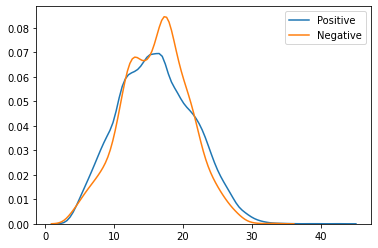

In [9]:
sns.kdeplot(df[df["label"]==0]["word_count"],label="Positive")
sns.kdeplot(df[df["label"]==1]["word_count"],label="Negative")

In [10]:
# Number of Characters

df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


<AxesSubplot:>

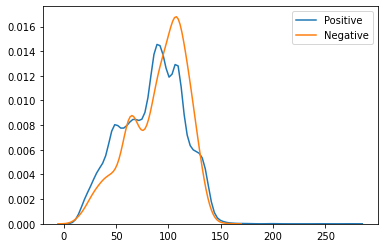

In [11]:
sns.kdeplot(df[df["label"]==0]["char_count"],label="Positive")
sns.kdeplot(df[df["label"]==1]["char_count"],label="Negative")

In [12]:
# Number of Stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


<AxesSubplot:>

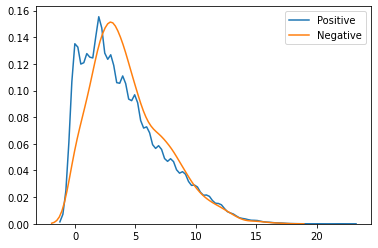

In [13]:
sns.kdeplot(df[df["label"]==0]["stopwords"],label="Positive")
sns.kdeplot(df[df["label"]==1]["stopwords"],label="Negative")

In [14]:
# Number of Hashtags

df['no_of_#gs'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['tweet','no_of_#gs']].head()

,tweet,no_of_#gs
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [15]:
# Removal of Punctuation 

import string
b=string.punctuation

def remove_punctuation(a):
    s=""
    l=[]
    for i in a.lower().split(" "):
        s=""
        for j in i:
            if j not in b:
                s=s+j
        if s!="":
            l.append(s)
    return l

In [16]:
df["tweet"]=df["tweet"].apply(lambda x: " ".join(remove_punctuation(x)))

In [17]:
df["tweet"].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

In [18]:
# Removal of Stopwords

df["tweet"]=df["tweet"].apply(lambda x: " ".join([i for i in x.split() if i not in stop and i!="user" and i.isalpha()]))
df["tweet"].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [19]:
# Spelling Correction

from textblob import TextBlob
df['tweet'][:10].apply(lambda x: str(TextBlob(x).correct()))
df["tweet"].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

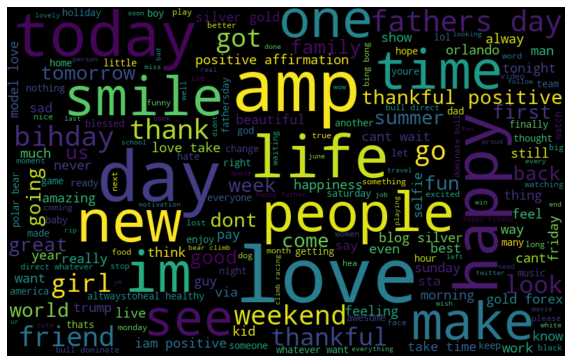

In [20]:
# Word Cloud for entire reviews

all_words = ' '.join([text for text in df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

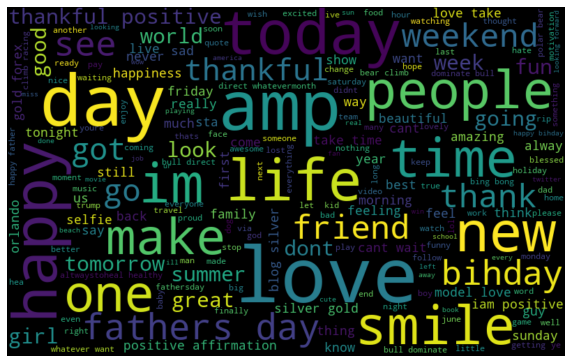

In [21]:
# Word Cloud for Positive 

all_words = ' '.join([text for text in df['tweet'][df["label"]==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

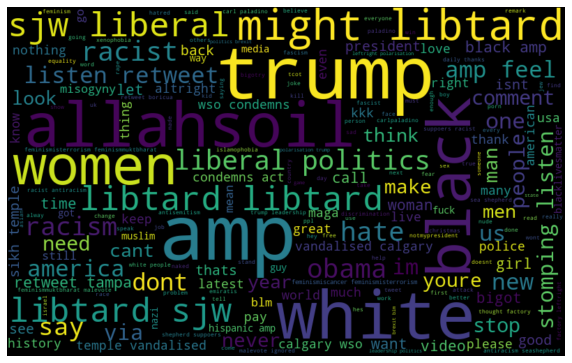

In [22]:
# Word Cloud for Negative 

all_words = ' '.join([text for text in df['tweet'][df["label"]==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:>

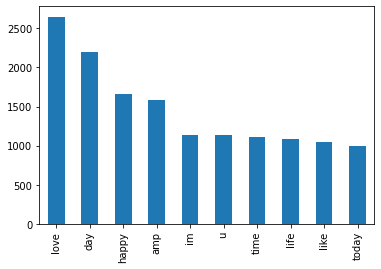

In [23]:
# Most frequent words in whole

freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
freq.plot.bar()


<AxesSubplot:>

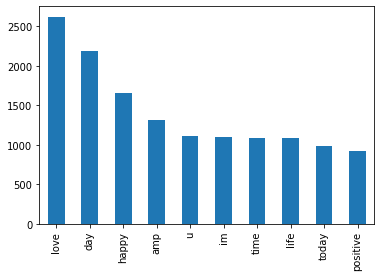

In [24]:
# Most frequent words in Positive Sentiment

freq = pd.Series(' '.join(df[df["label"]==0]['tweet']).split()).value_counts()[:10]
freq.plot.bar()


<AxesSubplot:>

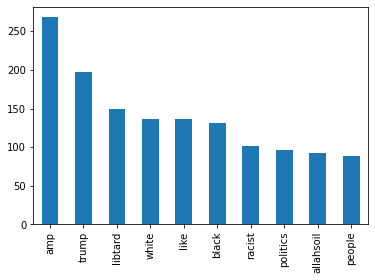

In [25]:
# Most frequent words in Negative Sentiment

freq = pd.Series(' '.join(df[df["label"]==1]['tweet']).split()).value_counts()[:10]
freq.plot.bar()


In [26]:
# Lemmatization and Tokenization

from textblob import Word
df['tweet'] = df['tweet'].apply(lambda x: ([Word(word).lemmatize() for word in x.split()]))
df['tweet'].head()

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, cant, use, cause, dont,...
2                                    [bihday, majesty]
3                      [model, love, u, take, u, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [27]:
df.head()

,label,tweet,word_count,char_count,stopwords,no_of_#gs
0,0,"[father, dysfunctional, selfish, drag, kid, dy...",21,102,10,1
1,0,"[thanks, lyft, credit, cant, use, cause, dont,...",22,122,5,3
2,0,"[bihday, majesty]",5,21,1,0
3,0,"[model, love, u, take, u, time]",17,86,5,1
4,0,"[factsguide, society, motivation]",8,39,1,1


In [28]:
X=df["tweet"]
y=df["label"]

In [29]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [30]:
df2=df.copy()

In [31]:
df2["tweet"]=df2["tweet"].apply(lambda k : " ".join(k))

In [32]:
df2.head()

,label,tweet,word_count,char_count,stopwords,no_of_#gs
0,0,father dysfunctional selfish drag kid dysfunct...,21,102,10,1
1,0,thanks lyft credit cant use cause dont offer w...,22,122,5,3
2,0,bihday majesty,5,21,1,0
3,0,model love u take u time,17,86,5,1
4,0,factsguide society motivation,8,39,1,1


In [33]:
df["tweet"]=df2["tweet"]

In [34]:
# No of Duplicates Before

df.duplicated().sum()


2520

In [35]:
# Removal of Duplicates

df=df.drop_duplicates()

In [36]:
# No of Duplictaes After

df.duplicated().sum()

0

In [37]:
X=df["tweet"]
y=df["label"]

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,stratify=y)

In [40]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (20609,)
X_test: (8833,)


In [41]:
# Logistic Regression Model 

from sklearn.linear_model import LogisticRegression

#Pipelining

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
pipeline1 = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors with Logistic Regression
])

# Model Fitting
pipeline1.fit(X_train,y_train)
# Model Prediction
y_prb=pipeline1.predict_proba(X_test)
y_pred_lre = y_prb[:,1] >= 0.3
y_pred_lre = y_pred_lre.astype(np.int)

In [42]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix,classification_report
cf_matrix=confusion_matrix(y_test,  y_pred_lre)
cf_matrix

array([[8187,   48],
       [ 368,  230]], dtype=int64)

<AxesSubplot:>

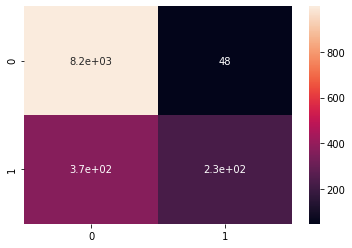

In [43]:
# Confusion Matrix in Visual Form

sns.heatmap(cf_matrix, annot=True,vmax=999)

In [44]:
# Classification Report for Logistic Regression Model


l=(classification_report(y_test, y_pred_lre)).split('\n')
for i in l:
    print (i)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8235
           1       0.83      0.38      0.53       598

    accuracy                           0.95      8833
   macro avg       0.89      0.69      0.75      8833
weighted avg       0.95      0.95      0.94      8833



In [50]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop = stopwords.words('english')
def prepare(a):
    s=""
    l=[]
    for i in a.lower().split(" "):
        s=""
        for j in i:
            if j not in string.punctuation:
                s=s+j
        if s!="" and s not in stop and s.isalpha() and s!="user":
            l.append(lemmatizer.lemmatize(s,"v"))
    return(" ".join(l))

In [64]:
s=prepare("it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia")

In [65]:
s

'unbelievable century wed need something like neverump xenophobia'

In [66]:
pipeline1.predict_proba([s])

array([[0.79601965, 0.20398035]])